<a href="https://colab.research.google.com/github/rohit-447/Ai-Threat-Detection/blob/main/pytorch_MNSITFASHION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNSIT Pytorch Model**

In [121]:
#@title Import of module
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [122]:
#@title DataSet Preparation

#Loding train dataset
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None)

#Loading Test Data
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)
print(f"Train Data: {len(train_data)}\nTest Data: {len(test_data)}")

#See the classes of Dataset
class_name=train_data.classes
class_to_idx=train_data.class_to_idx
print(f"Classes of Dataset:{class_to_idx}")


Train Data: 60000
Test Data: 10000
Classes of Dataset:{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


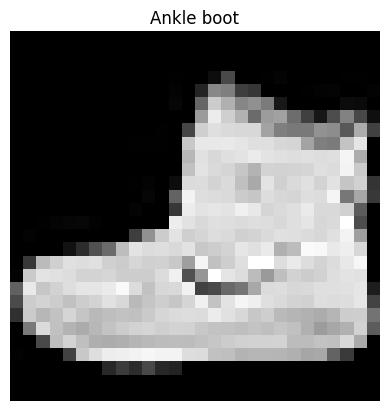

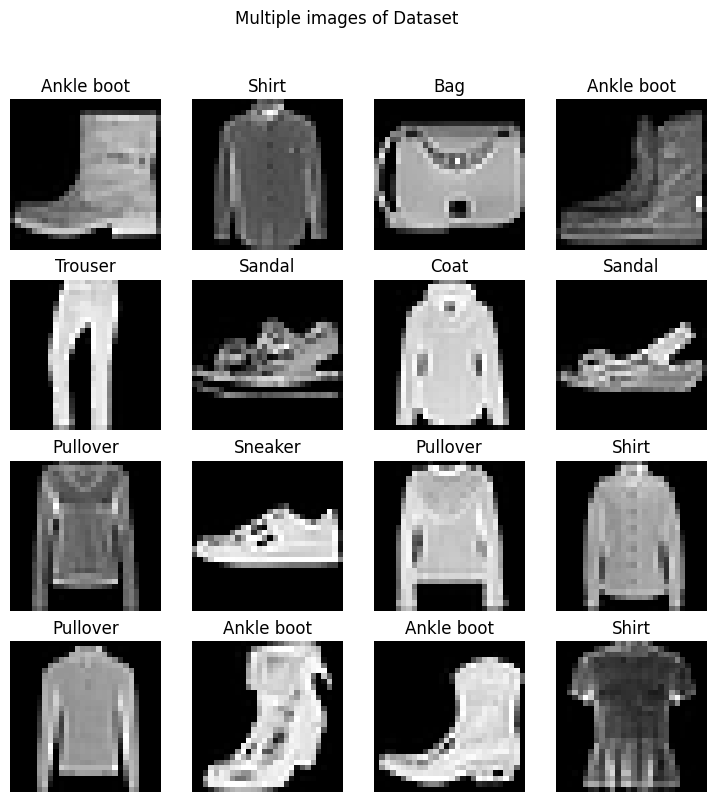

In [123]:
#@title Visualization of Dataset

#Visualization on an image
img, label= train_data[0]
plt.imshow(img.squeeze(), cmap = "grey")
plt.title(class_name[label])
plt.axis(False)

#Displaying multi image from training data
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
row=4
cols=4
for i in range(1, row*cols+1):
  random_idx=torch.randint(low=0, high=len(train_data), size=[1]).item()
  img, label= train_data[random_idx]
  fig.add_subplot(row, cols, i)
  fig.suptitle("Multiple images of Dataset")
  fig.set_label("Multiple images of Dataset")
  plt.imshow(img.squeeze(), cmap="grey")
  plt.title(class_name[label])
  plt.axis(False)

In [124]:
#@title Device Agnoistic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

Using device: cpu


Size of train features batch: torch.Size([32, 1, 28, 28]),
Size of label datatorch.Size([32])


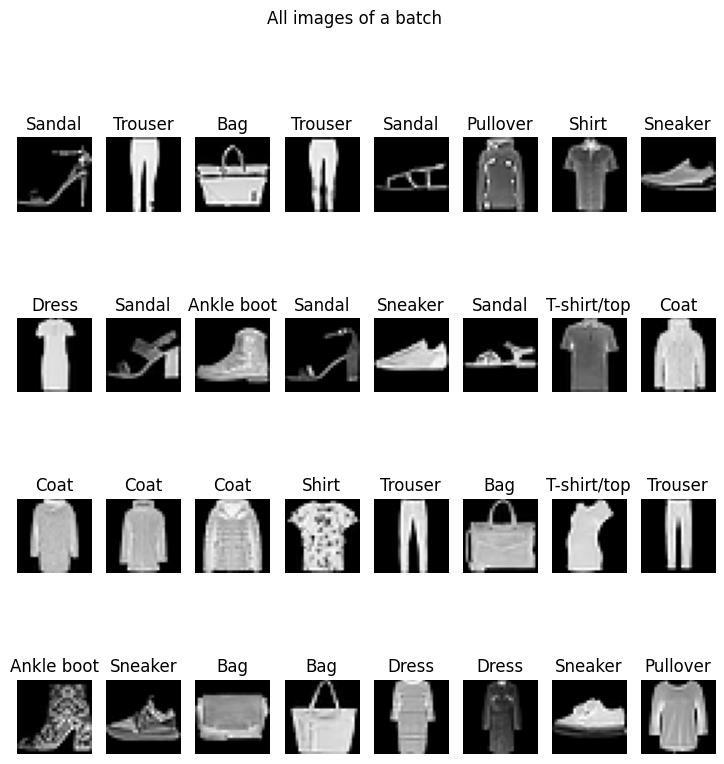

In [125]:
#@title Preparing the DataLoader
BATCH_SIZE=32
train_dataloder=DataLoader(train_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True)

test_dataloader=DataLoader(test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True)

train_features_batch, train_label_batch=next(iter(train_dataloder))
print(f'Size of train features batch: {train_features_batch.shape},\nSize of label data{train_label_batch.shape}')

#show all the images of a batch
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows = 4
cols = 8

for i in range(BATCH_SIZE):
  img = train_features_batch[i].squeeze(dim=0)
  label = train_label_batch[i]

  fig.add_subplot(rows, cols, i + 1)
  plt.imshow(img, cmap='grey')
  plt.title(class_name[label])
  plt.axis(False)

plt.suptitle("All images of a batch")
plt.show()

In [126]:
#@title Model for MNSIT
class FashionMNISTv0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, X:torch.tensor):
    return self.linear_layer_stack(X)

#Model Setup
torch.manual_seed(42)
model_0= FashionMNISTv0(input_shape=784,
                        hidden_units=8,
                        output_shape=len(class_name)).to(device)

#passing a dummy image to model
dummy_img=torch.rand(size=(1,784))
model_0(dummy_img)

tensor([[0.0000, 0.0582, 0.1217, 0.2455, 0.4327, 0.0000, 0.0560, 0.0000, 0.1949,
         0.4139]], grad_fn=<ReluBackward0>)

In [128]:
#@title Accuracy loss fun and optimizer
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true,y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

#loss fn
loss_fn=nn.CrossEntropyLoss()

#optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [130]:
#training loop per epoch
from timeit import default_timer as timer
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start=timer()
epoch=3
for epoch in tqdm(range(epoch)):
  print(f"Epochs: {epoch}\n ---")
  train_loss=0

  #loop for training per batch
  for batch, (X,y) in enumerate(train_dataloder)
  model_0.train()

  #forwward pass
  y_pred=model_0(X)

  #loss and optm
  loss=loss_fn(y_pred, y)
  test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
  train_loss+=loss
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if batch % 400 ==0:
    print(f"Looked at {batch*len(X)} / {len(train_dataloder.dataset)} Samples")

  #divide the loss/ acc by the length of dataloader (per batch)
    test_acc/=len(test_dataloader)
    print(f"\nTraining loss :{train_loss:.5f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%/n")





  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
 ---
Epochs: 1
 ---
Epochs: 2
 ---
